# CNN Feature Extraction and Model Comparison

Exploring convolutional neural networks on MNIST: from basic convolution operations to comparing multiple architectures.

In [25]:
# Install required packages
!pip install tensorflow keras numpy matplotlib opencv-python

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model
from keras.utils import to_categorical

## Part 1: Understanding Convolution Operations

Visualizing how a single convolution layer transforms an input through padding, filtering, and feature map generation.

In [27]:
def add_padding(matrix, padding):
    """Add zero padding around matrix edges."""
    return np.pad(matrix, ((padding, padding), (padding, padding), (0, 0)), 
                  mode='constant', constant_values=0)

def generate_random_matrix(n, m):
    """Generate random RGB matrix for testing."""
    return np.random.randint(0, 6, size=(n, m, 3))

In [28]:
# Simple CNN: 2 filters, 3x3 kernel, no activation
model = Sequential([
    Conv2D(filters=2, kernel_size=(3, 3), activation=None, 
           use_bias=True, input_shape=(5, 5, 3))
])

model.summary()

# Generate test input
input_matrix = generate_random_matrix(5, 5)
padded_matrix = add_padding(input_matrix, padding=1)

# Extract filters and compute feature maps
filters = model.layers[0].get_weights()[0]
input_batch = np.expand_dims(padded_matrix, axis=0)
feature_maps = model.predict(input_batch)[0]

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


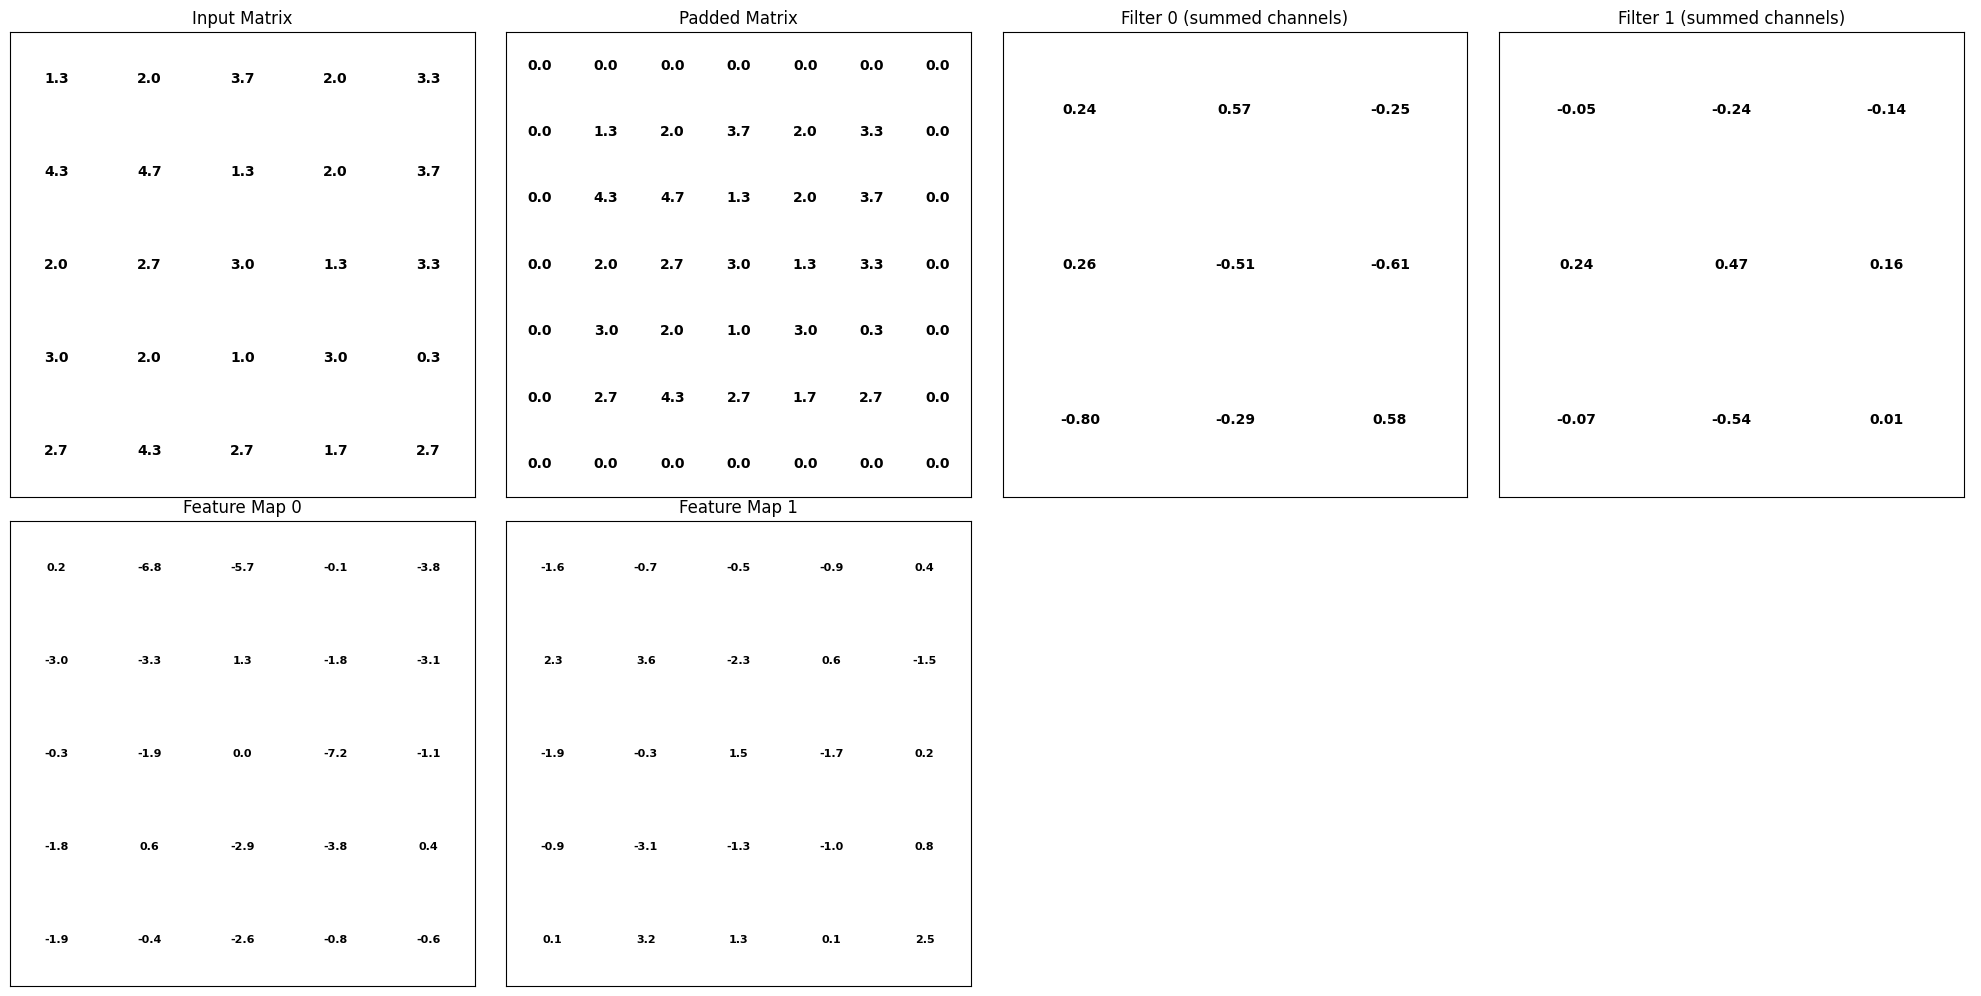

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Show original input matrix (average across RGB channels for single channel display)
input_gray = np.mean(input_matrix, axis=2)
axes[0, 0].set_title("Input Matrix")
axes[0, 0].set_xlim(-0.5, input_gray.shape[1] - 0.5)
axes[0, 0].set_ylim(input_gray.shape[0] - 0.5, -0.5)
axes[0, 0].set_aspect('equal')
# Add text annotations showing the numbers only
for i in range(input_gray.shape[0]):
    for j in range(input_gray.shape[1]):
        axes[0, 0].text(j, i, f'{input_gray[i, j]:.1f}', ha='center', va='center', fontweight='bold')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# Show padded input matrix (average across RGB channels for single channel display)
padded_gray = np.mean(padded_matrix, axis=2)
axes[0, 1].set_title("Padded Matrix")
axes[0, 1].set_xlim(-0.5, padded_gray.shape[1] - 0.5)
axes[0, 1].set_ylim(padded_gray.shape[0] - 0.5, -0.5)
axes[0, 1].set_aspect('equal')
# Add text annotations showing the numbers only
for i in range(padded_gray.shape[0]):
    for j in range(padded_gray.shape[1]):
        axes[0, 1].text(j, i, f'{padded_gray[i, j]:.1f}', ha='center', va='center', fontweight='bold')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# Show Filter 0 (sum across input channels for visualization)
filter_display_0 = filters[:, :, :, 0].sum(axis=2)
axes[0, 2].set_title("Filter 0 (summed channels)")
axes[0, 2].set_xlim(-0.5, filter_display_0.shape[1] - 0.5)
axes[0, 2].set_ylim(filter_display_0.shape[0] - 0.5, -0.5)
axes[0, 2].set_aspect('equal')
# Add text annotations showing the numbers only
for i in range(filter_display_0.shape[0]):
    for j in range(filter_display_0.shape[1]):
        axes[0, 2].text(j, i, f'{filter_display_0[i, j]:.2f}', ha='center', va='center', fontweight='bold')
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])

# Show Filter 1 (sum across input channels for visualization)
filter_display_1 = filters[:, :, :, 1].sum(axis=2)
axes[0, 3].set_title("Filter 1 (summed channels)")
axes[0, 3].set_xlim(-0.5, filter_display_1.shape[1] - 0.5)
axes[0, 3].set_ylim(filter_display_1.shape[0] - 0.5, -0.5)
axes[0, 3].set_aspect('equal')
# Add text annotations showing the numbers only
for i in range(filter_display_1.shape[0]):
    for j in range(filter_display_1.shape[1]):
        axes[0, 3].text(j, i, f'{filter_display_1[i, j]:.2f}', ha='center', va='center', fontweight='bold')
axes[0, 3].set_xticks([])
axes[0, 3].set_yticks([])

# Show feature maps
for idx in range(2):
    axes[1, idx].set_title(f"Feature Map {idx}")
    axes[1, idx].set_xlim(-0.5, feature_maps.shape[1] - 0.5)
    axes[1, idx].set_ylim(feature_maps.shape[0] - 0.5, -0.5)
    axes[1, idx].set_aspect('equal')
    # Add text annotations showing the numbers only
    for i in range(feature_maps.shape[0]):
        for j in range(feature_maps.shape[1]):
            axes[1, idx].text(j, i, f'{feature_maps[i, j, idx]:.1f}', ha='center', va='center', fontweight='bold', fontsize=8)
    axes[1, idx].set_xticks([])
    axes[1, idx].set_yticks([])

# Hide the unused subplots
axes[1, 2].axis('off')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

## Part 2: Model Architecture Comparison

Training 10 different CNN architectures on MNIST to compare their performance.

In [30]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [31]:
# Model configurations: varying depth, filter counts, and pooling
model_configs = [
    {'Conv1': (8, (3, 3), 'relu', True, (28, 28, 1)), 'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (16, (3, 3), 'relu', True, (28, 28, 1)), 'MaxPool1': ((2, 2), (2, 2)), 
     'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (8, (5, 5), 'relu', True, (28, 28, 1)), 'MaxPool1': ((2, 2), (2, 2)), 
     'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (16, (3, 3), 'relu', True, (28, 28, 1)), 'Conv2': (32, (3, 3), 'relu', True, None), 
     'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (32, (3, 3), 'relu', True, (28, 28, 1)), 'MaxPool1': ((2, 2), (2, 2)), 
     'Conv2': (64, (3, 3), 'relu', True, None), 'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (8, (3, 3), 'relu', True, (28, 28, 1)), 'MaxPool1': ((2, 2), (2, 2)), 
     'Conv2': (8, (3, 3), 'relu', True, None), 'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (16, (5, 5), 'relu', True, (28, 28, 1)), 'MaxPool1': ((2, 2), (2, 2)), 
     'Conv2': (32, (3, 3), 'relu', True, None), 'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (32, (3, 3), 'relu', True, (28, 28, 1)), 'Conv2': (32, (3, 3), 'relu', True, None), 
     'MaxPool1': ((2, 2), (2, 2)), 'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (8, (3, 3), 'relu', True, (28, 28, 1)), 'Conv2': (8, (3, 3), 'relu', True, None), 
     'Conv3': (8, (3, 3), 'relu', True, None), 'Flatten': (), 'Dense': (10, 'softmax')},
    {'Conv1': (64, (3, 3), 'relu', True, (28, 28, 1)), 'MaxPool1': ((2, 2), (2, 2)), 
     'Conv2': (128, (3, 3), 'relu', True, None), 'Flatten': (), 'Dense': (10, 'softmax')}
]

def build_model(config):
    """Build model from layer configuration."""
    model = Sequential()
    for name, params in config.items():
        if 'conv' in name.lower():
            filters, kernel_size, activation, use_bias, input_shape = params
            kwargs = {'filters': filters, 'kernel_size': kernel_size, 
                     'activation': activation, 'use_bias': use_bias}
            if input_shape:
                kwargs['input_shape'] = input_shape
            model.add(Conv2D(**kwargs))
        elif 'maxpool' in name.lower():
            pool_size, strides = params
            model.add(MaxPool2D(pool_size=pool_size, strides=strides))
        elif 'flatten' in name.lower():
            model.add(Flatten())
        elif 'dense' in name.lower():
            units, activation = params
            model.add(Dense(units, activation=activation))
    return model

In [32]:
# Train all models
histories = []
for idx, config in enumerate(model_configs):
    print(f"Training model {idx+1}/10...")
    model = build_model(config)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, 
                       validation_split=0.1, verbose=0)
    histories.append(history)
    print(f"Model {idx+1} - Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Training model 1/10...
Model 1 - Val Accuracy: 0.9747
Training model 2/10...
Model 1 - Val Accuracy: 0.9747
Training model 2/10...
Model 2 - Val Accuracy: 0.9810
Training model 3/10...
Model 3 - Val Accuracy: 0.9773
Training model 4/10...
Model 4 - Val Accuracy: 0.9857
Training model 5/10...
Model 5 - Val Accuracy: 0.9892
Training model 6/10...
Model 6 - Val Accuracy: 0.9825
Training model 7/10...
Model 7 - Val Accuracy: 0.9888
Training model 8/10...
Model 8 - Val Accuracy: 0.9878
Training model 9/10...
Model 9 - Val Accuracy: 0.9865
Training model 10/10...
Model 10 - Val Accuracy: 0.9907


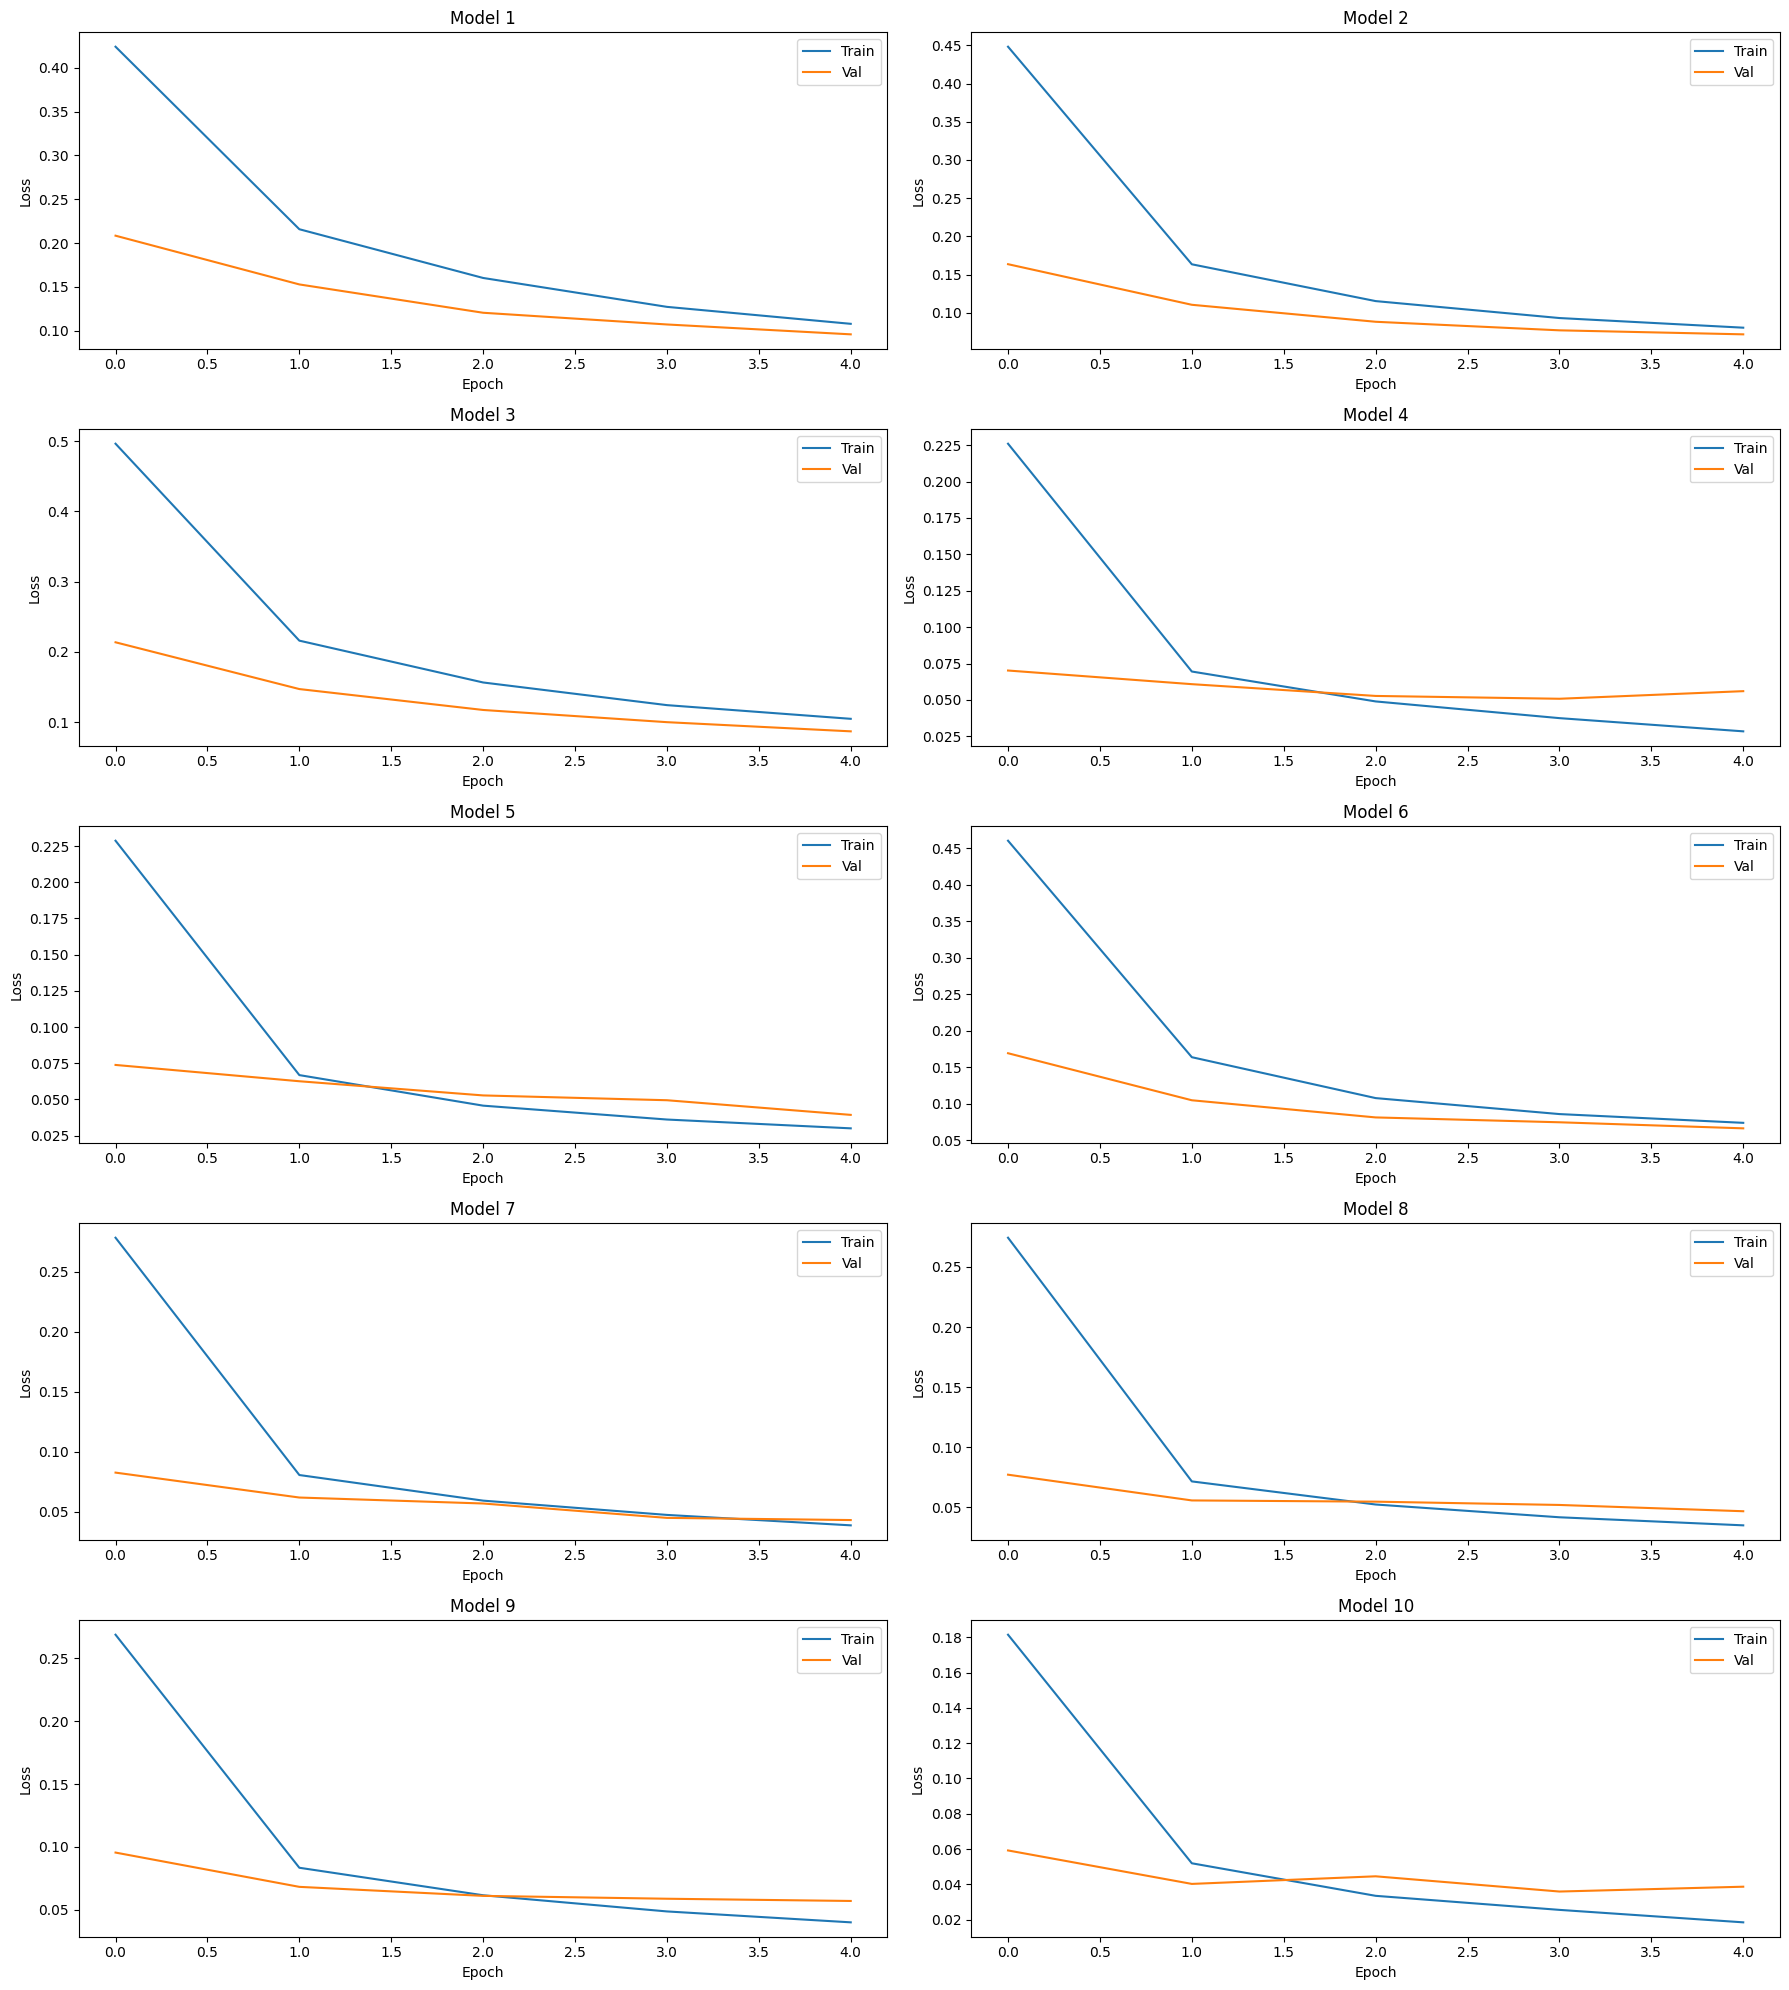

In [33]:
# Plot training curves
plt.figure(figsize=(18, 20))
for idx, history in enumerate(histories):
    plt.subplot(5, 2, idx + 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'Model {idx+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
plt.tight_layout()
plt.show()

## Part 3: Feature Map Visualization

Examining what the best performing models learn by visualizing intermediate layer activations.

In [34]:
# Identify top 3 models
val_accuracies = [(h.history['val_accuracy'][-1], idx) for idx, h in enumerate(histories)]
val_accuracies.sort(reverse=True)
top_3_indices = [idx for _, idx in val_accuracies[:3]]

print("Top 3 models:", [f"Model {idx+1} ({val_accuracies[i][0]:.4f})" 
                        for i, (_, idx) in enumerate(val_accuracies[:3])])

Top 3 models: ['Model 10 (0.9907)', 'Model 5 (0.9892)', 'Model 7 (0.9888)']


In [38]:
# Find a digit 7 in the test set
digit_7_indices = np.where(np.argmax(y_test, axis=1) == 7)[0]
sample_image = x_test[digit_7_indices[0]]
sample_label = 7

print(f"Analyzing digit {sample_label} (test image index: {digit_7_indices[0]})")

Analyzing digit 7 (test image index: 0)


In [39]:
def extract_feature_maps(model, layer_name, input_data):
    """Extract activations from a specific layer."""
    intermediate_model = Model(inputs=model.layers[0].input, 
                              outputs=model.get_layer(layer_name).output)
    return intermediate_model.predict(input_data, verbose=0)

def visualize_feature_maps(feature_maps, model_idx, label, layer_name):
    """Display feature maps in a grid."""
    feature_maps = np.squeeze(feature_maps, axis=0)
    n_maps = feature_maps.shape[-1] if feature_maps.ndim == 3 else 1
    
    grid_size = int(np.ceil(np.sqrt(n_maps)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    fig.suptitle(f'Model {model_idx+1}, Digit {label} - {layer_name}', 
                 fontsize=14)
    
    axes = axes.ravel() if n_maps > 1 else [axes]
    
    for i in range(n_maps):
        fmap = feature_maps[:, :, i] if feature_maps.ndim == 3 else feature_maps
        axes[i].imshow(fmap, cmap='viridis')
        axes[i].set_title(f'Filter {i+1}')
        axes[i].axis('off')
    
    for j in range(n_maps, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


Model 10 feature maps for digit 7:


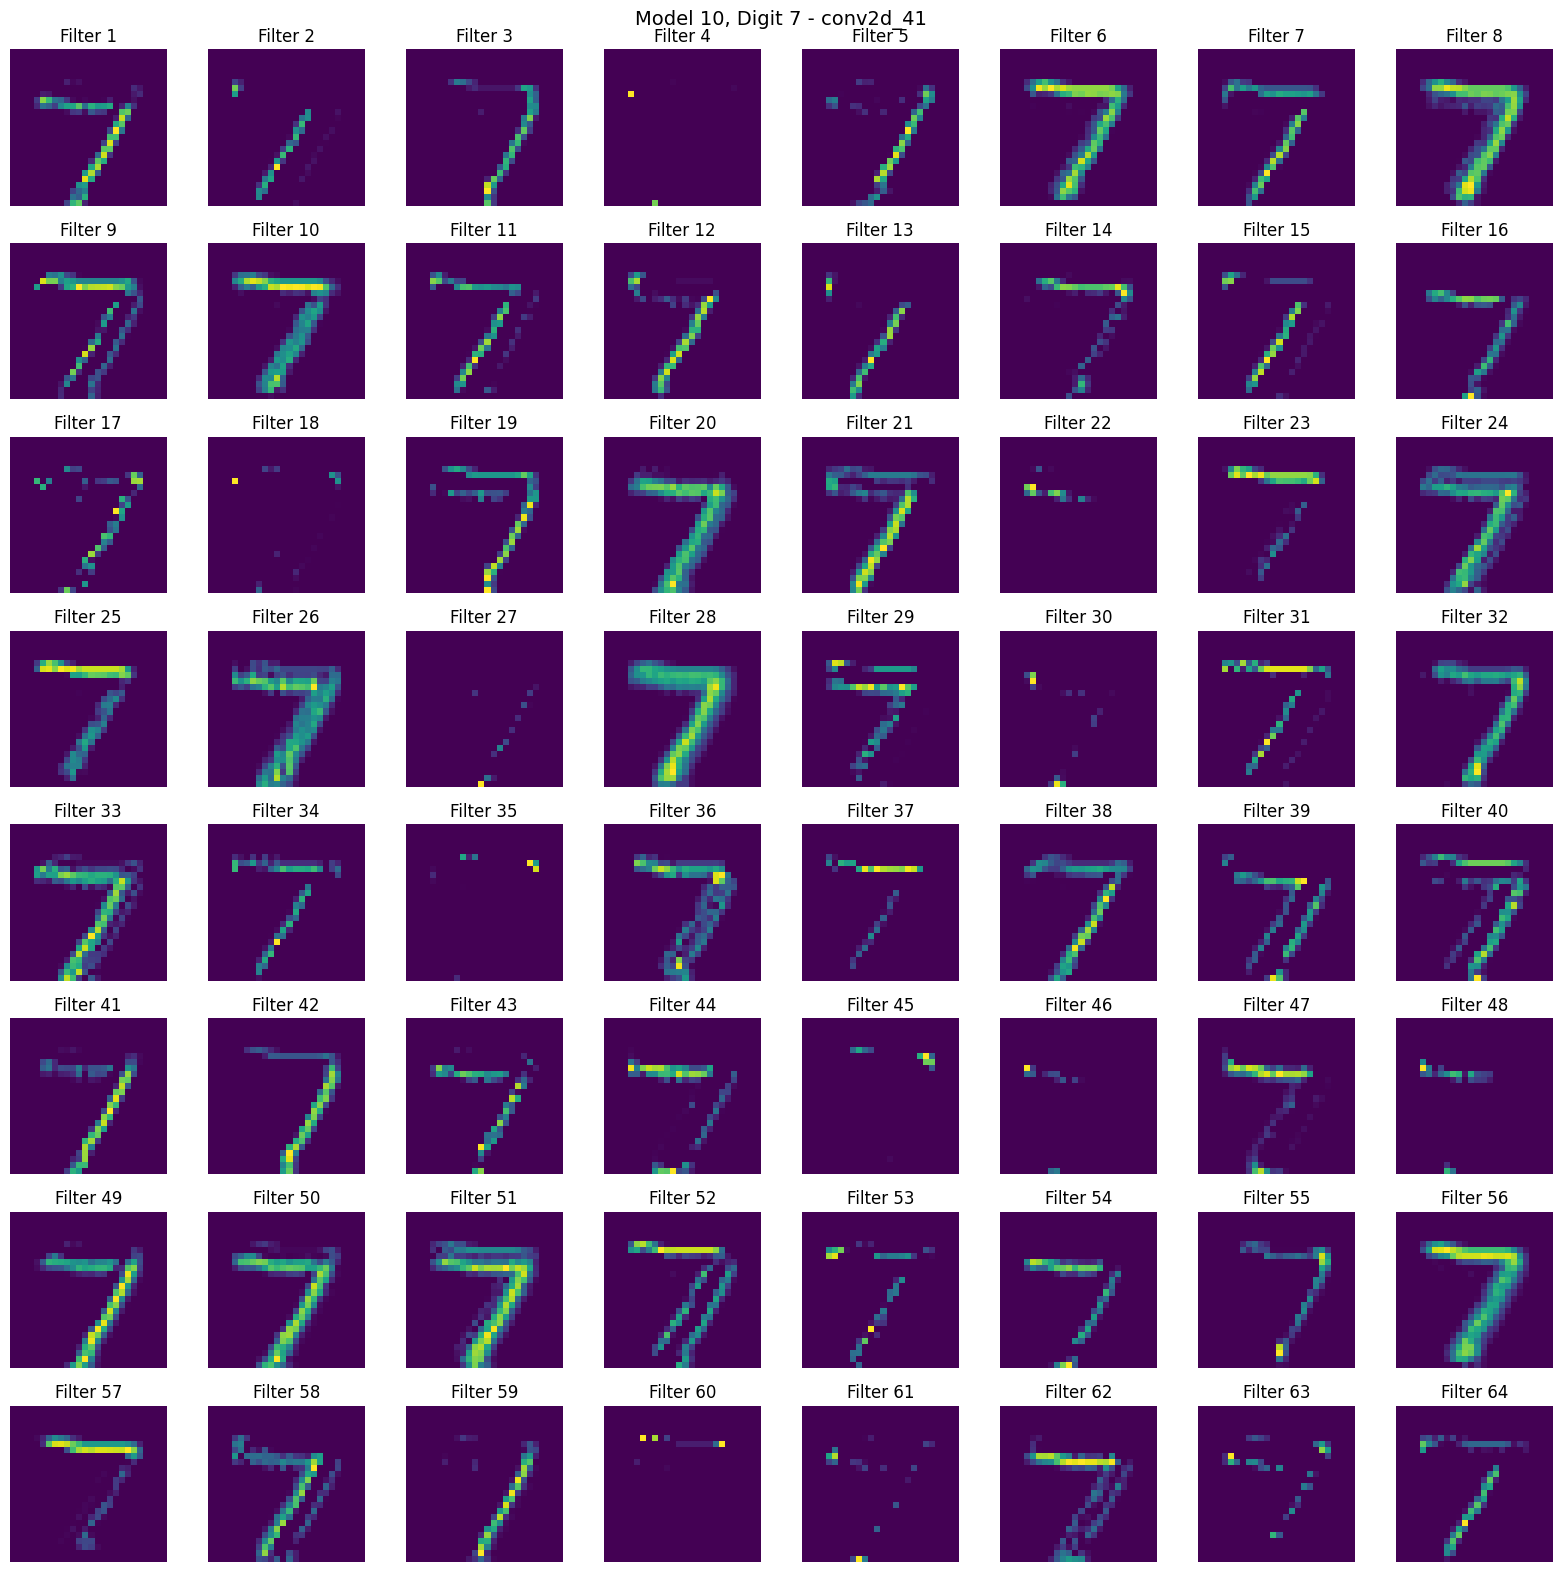

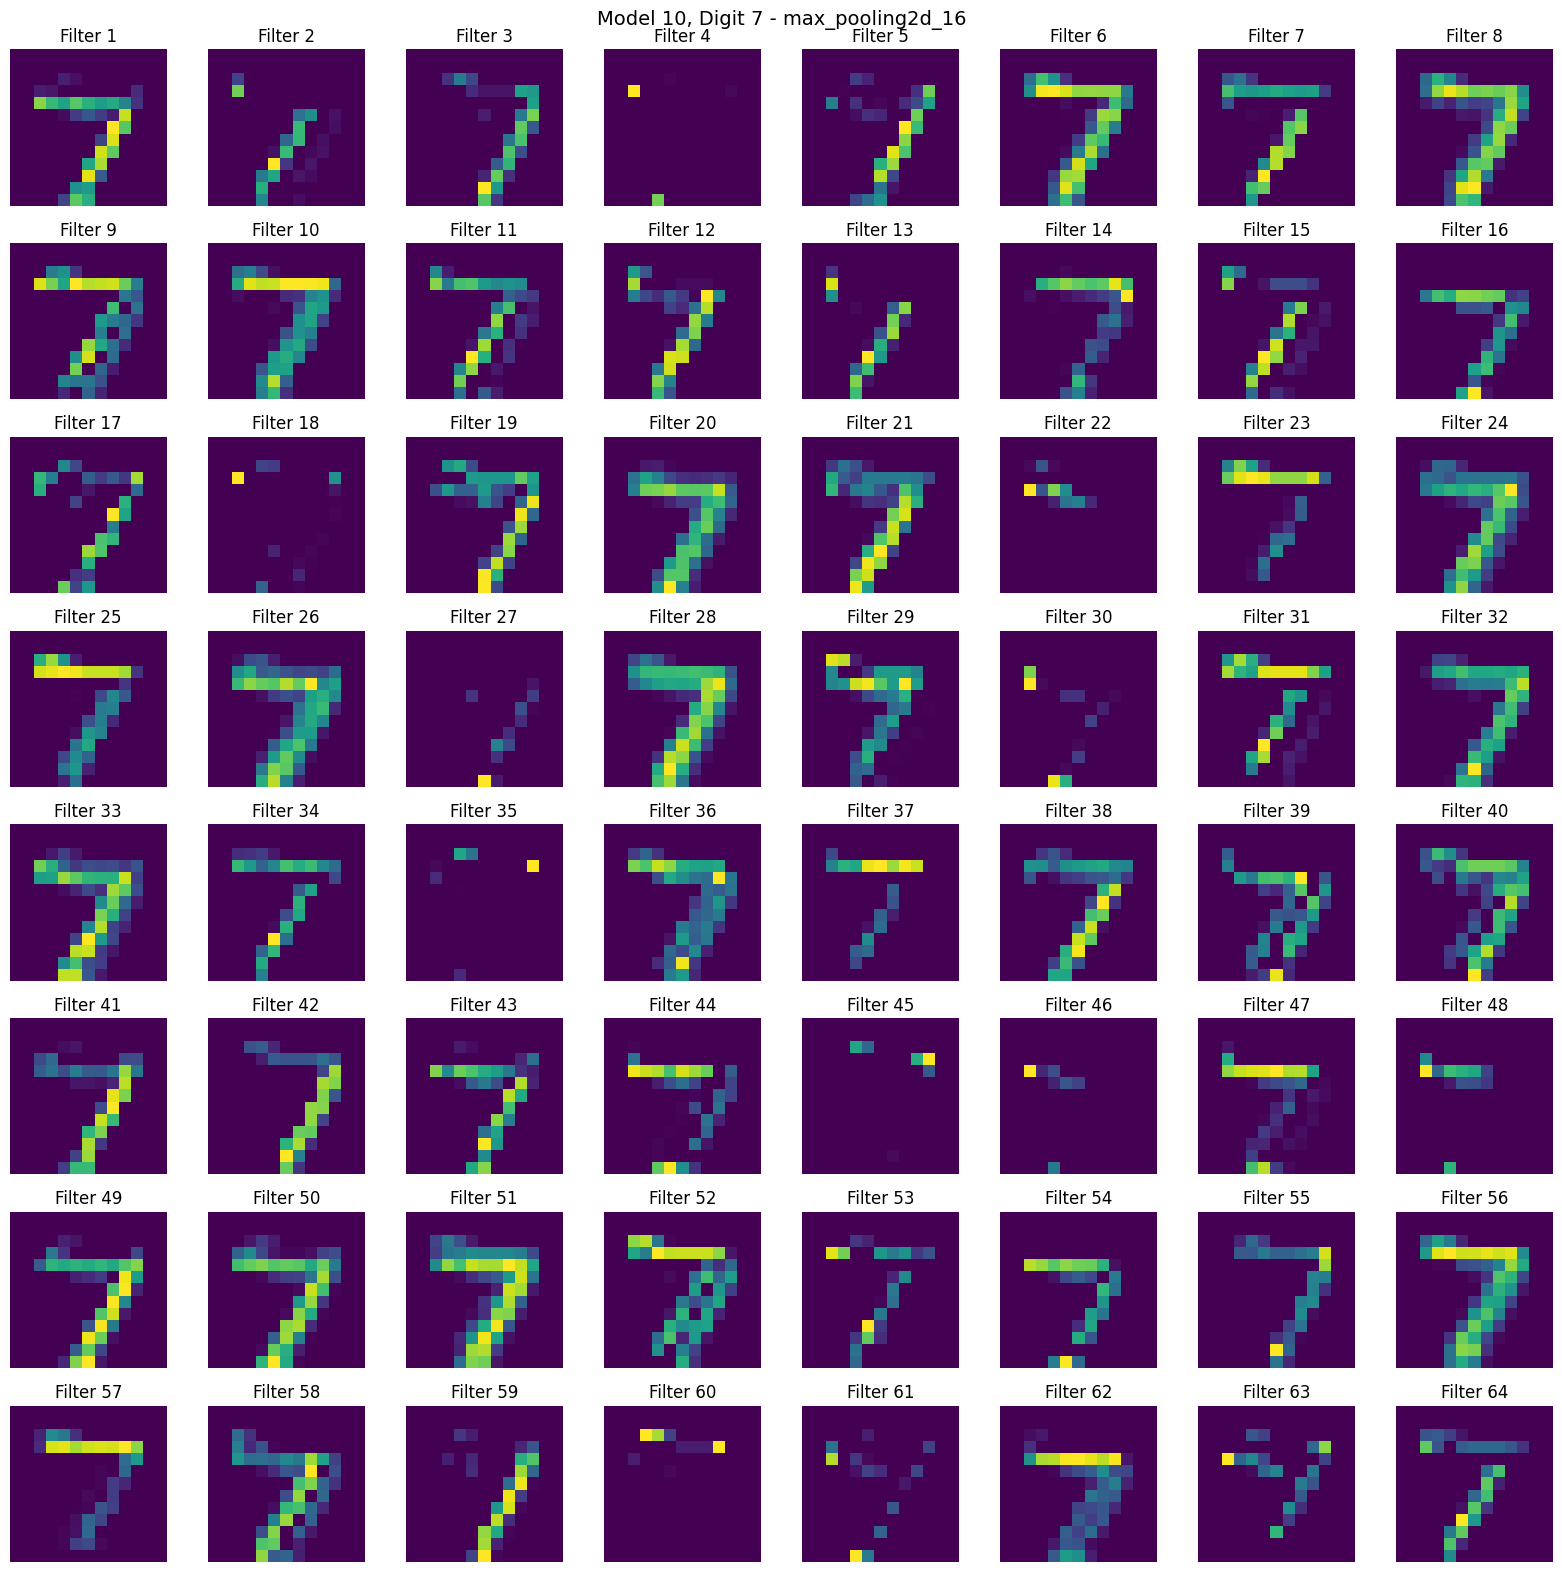

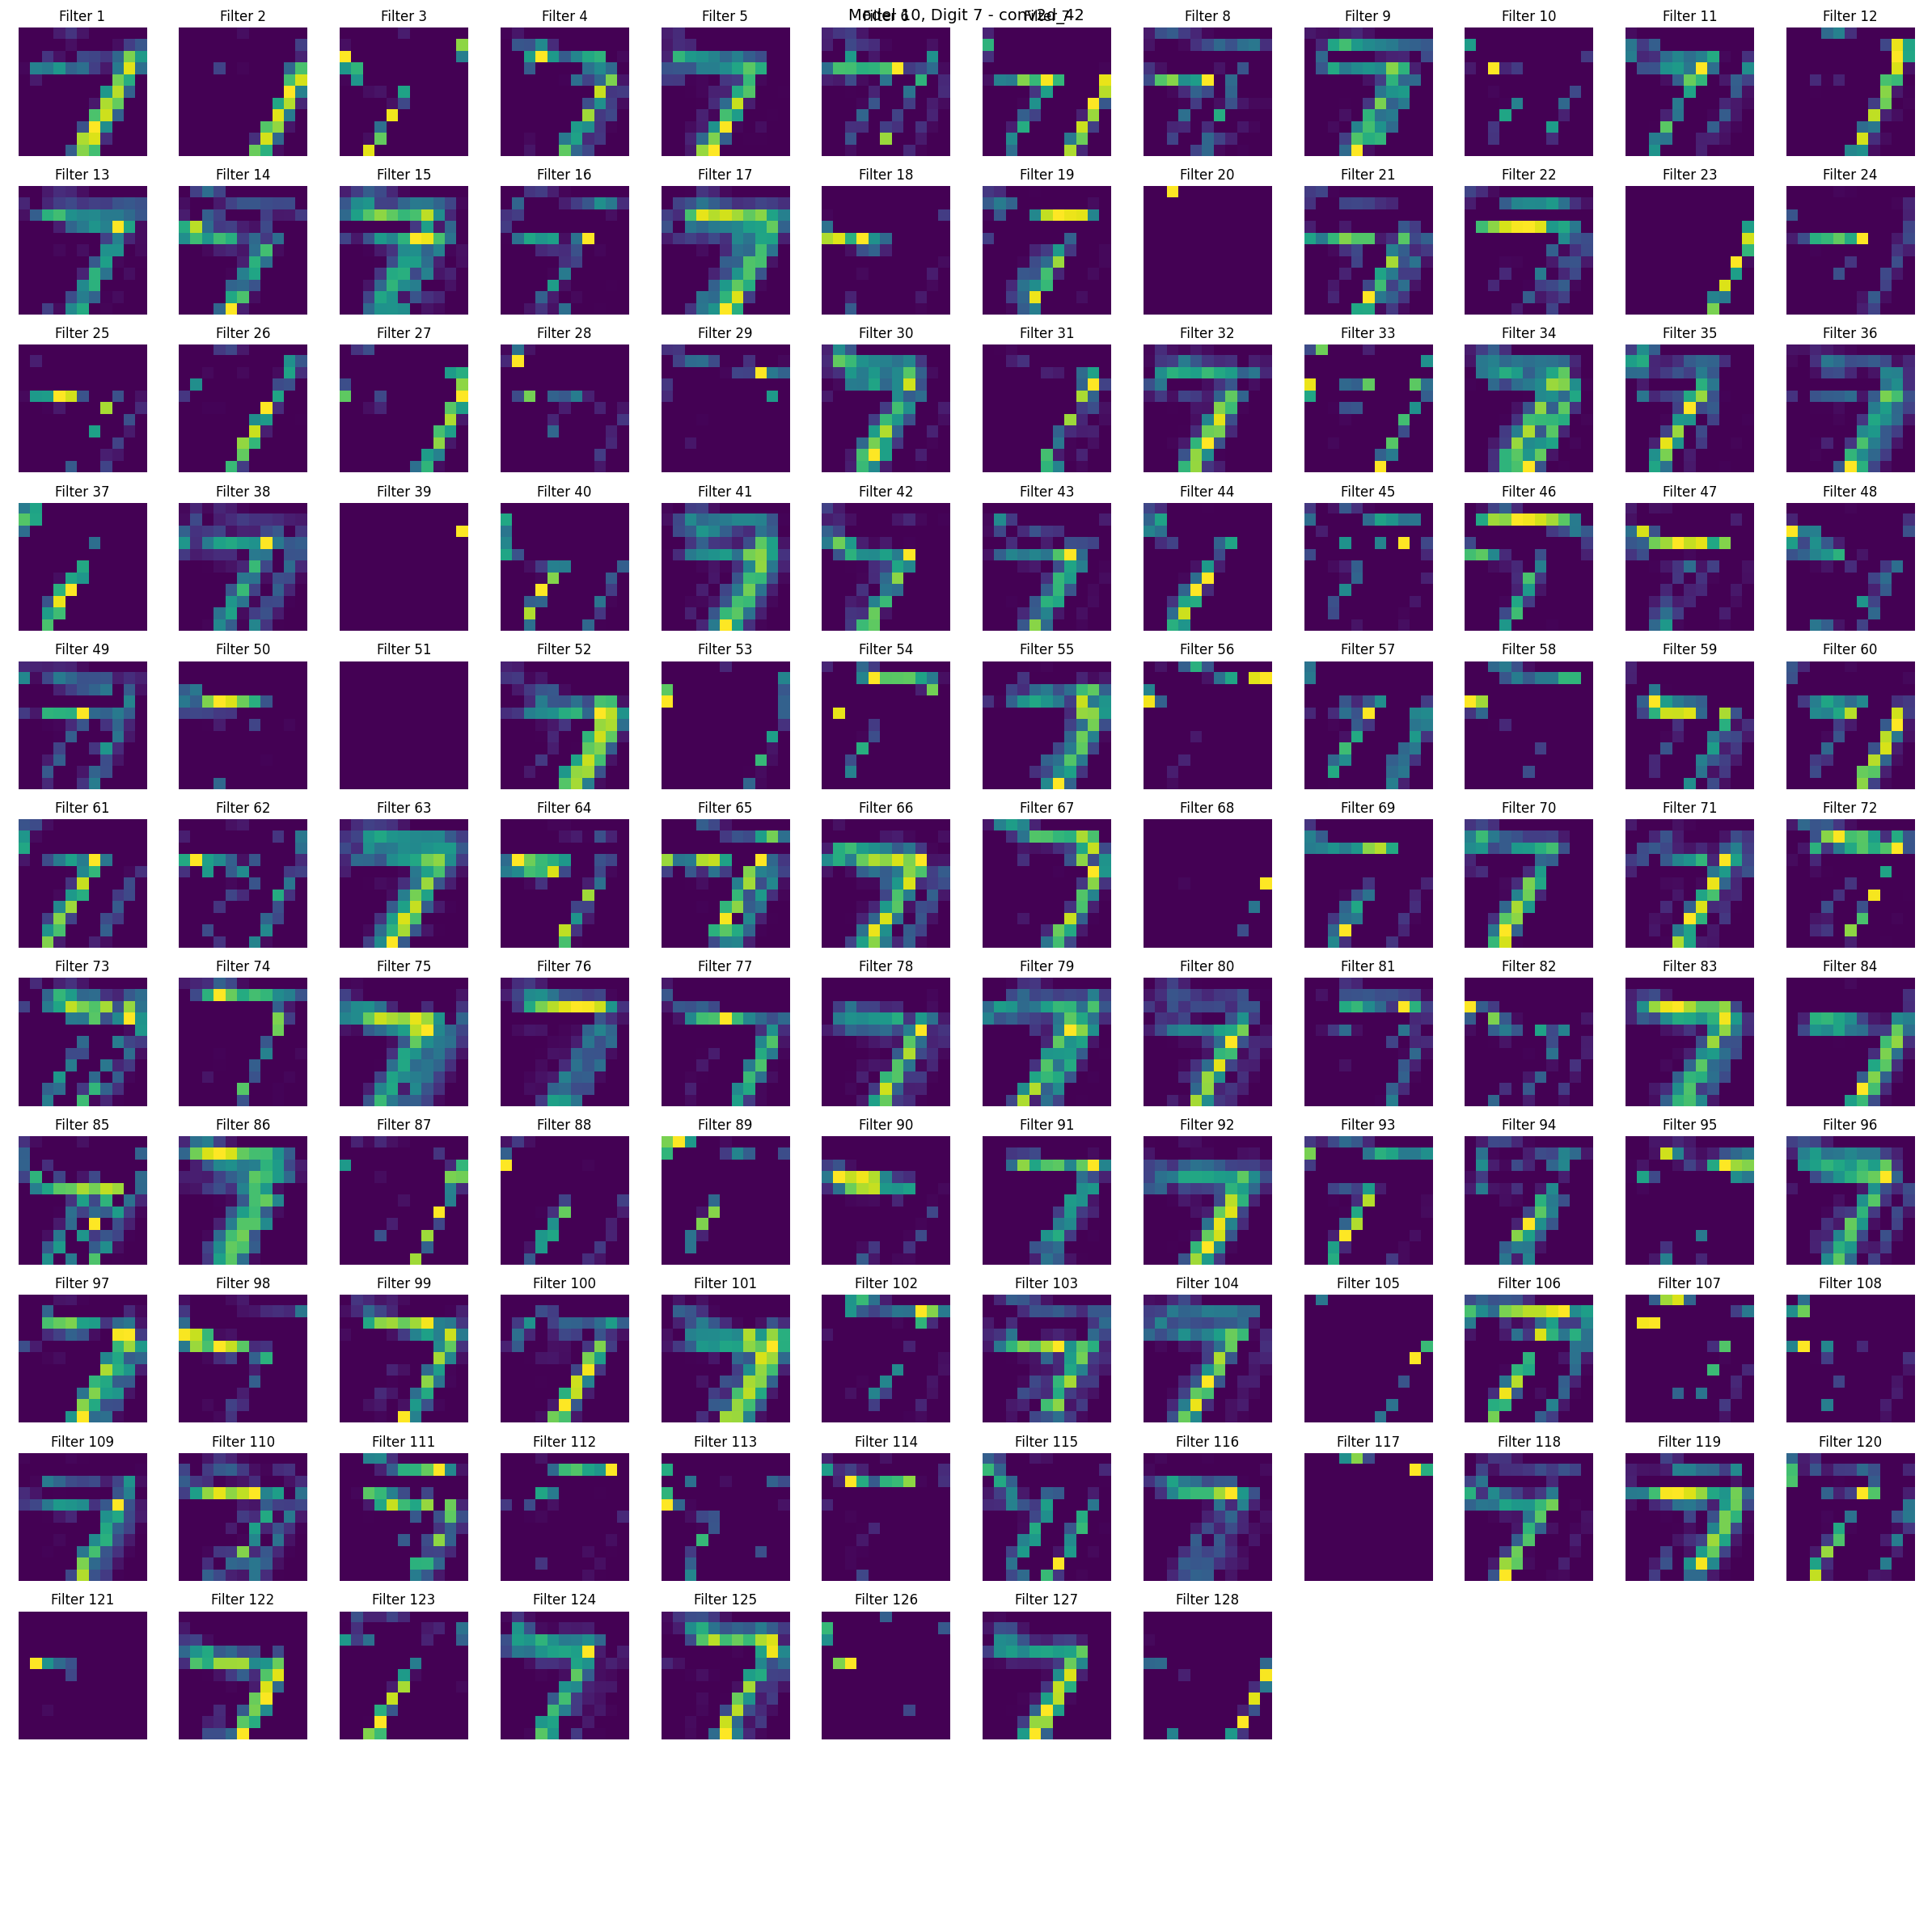


Model 5 feature maps for digit 7:


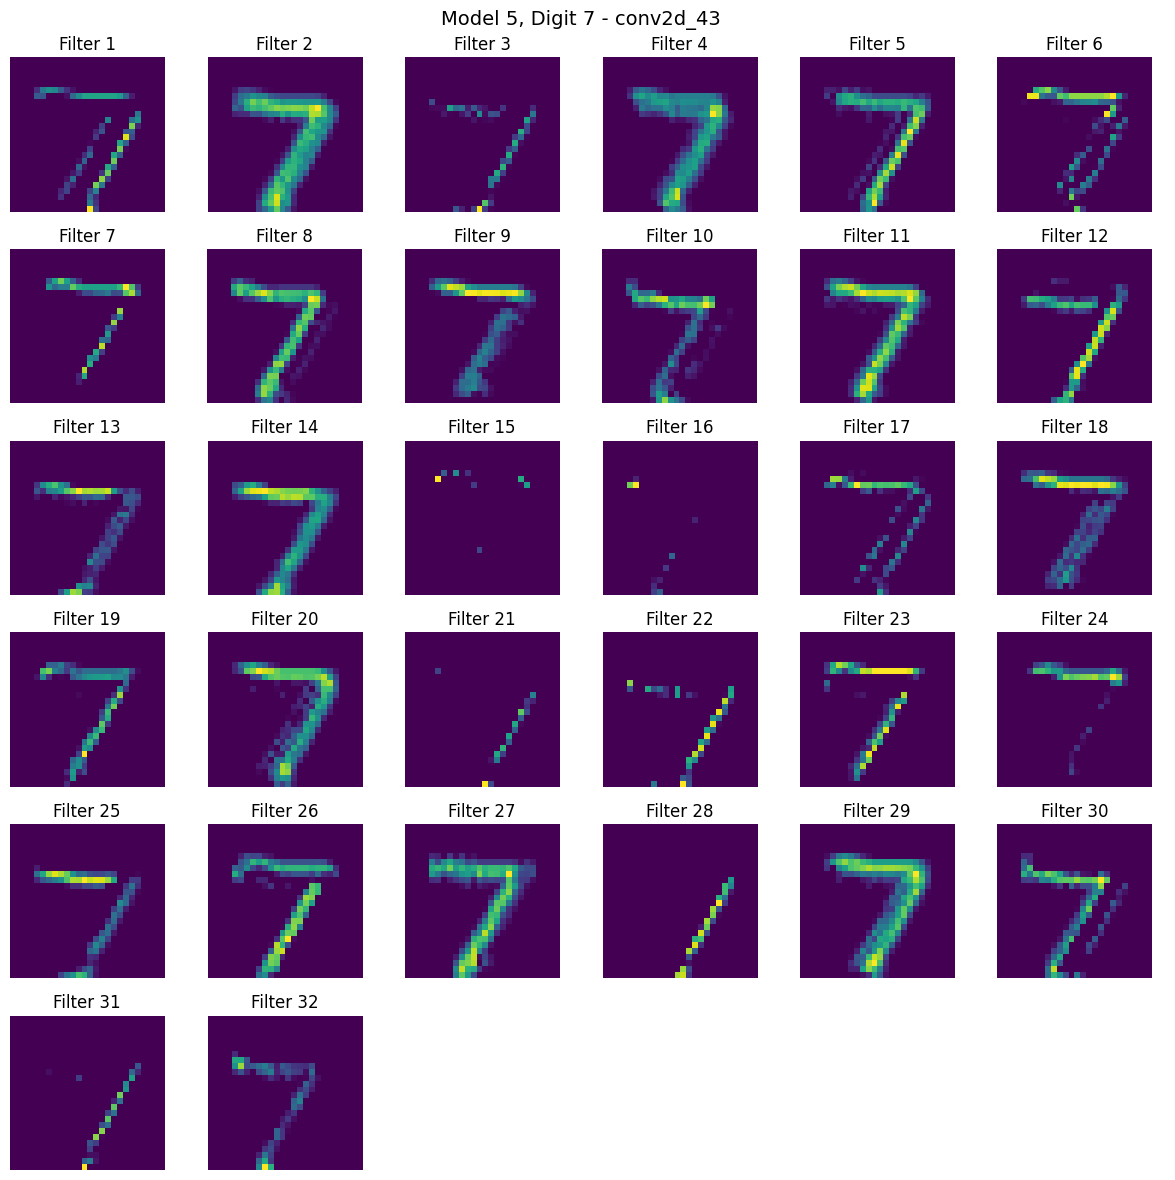

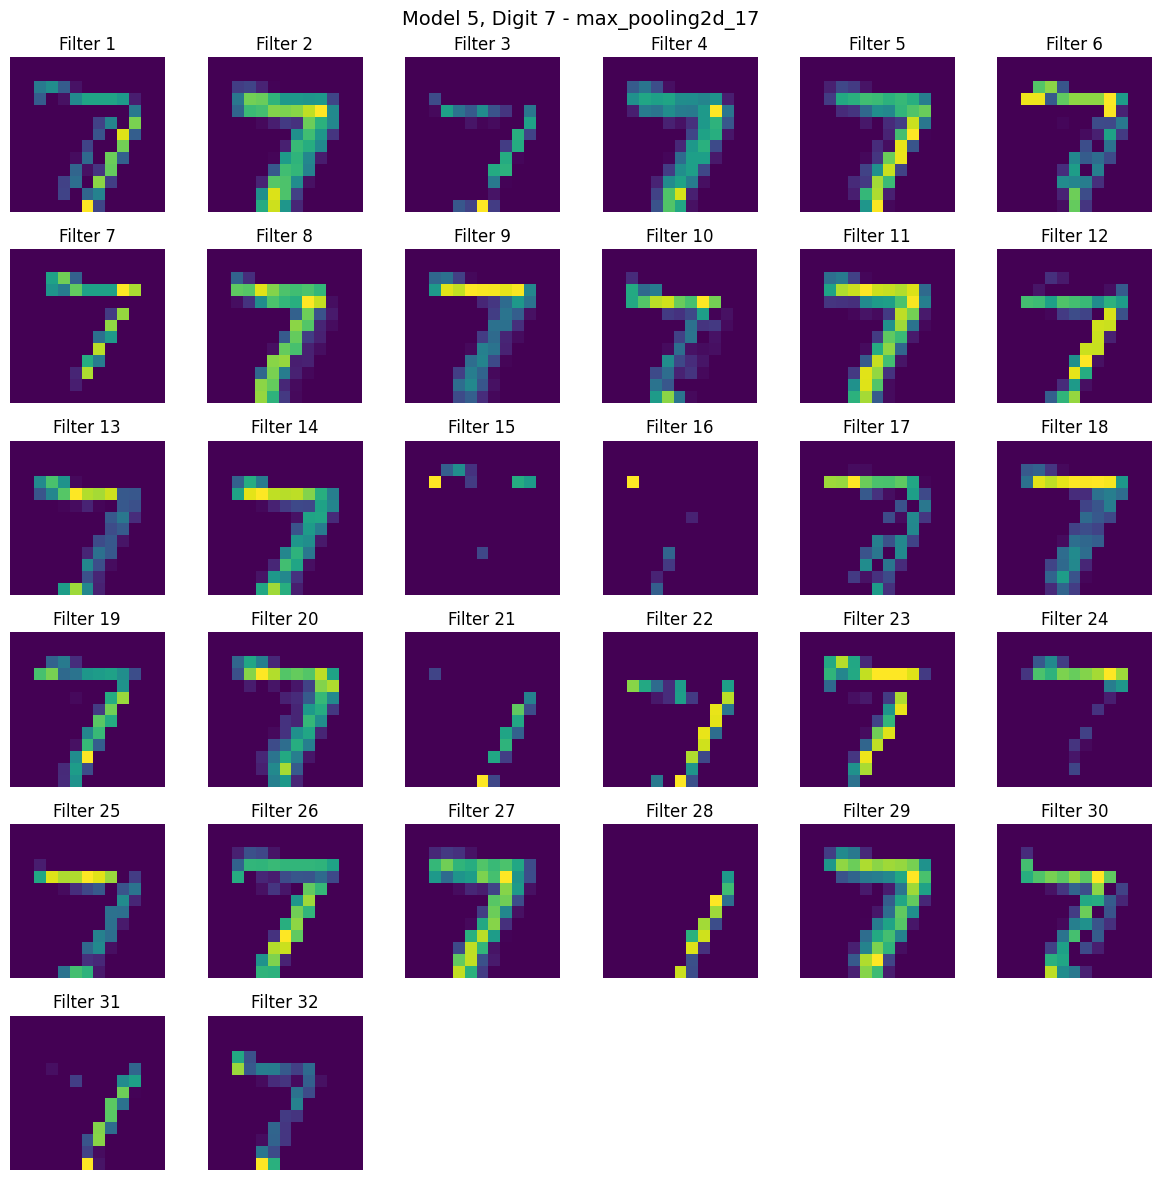

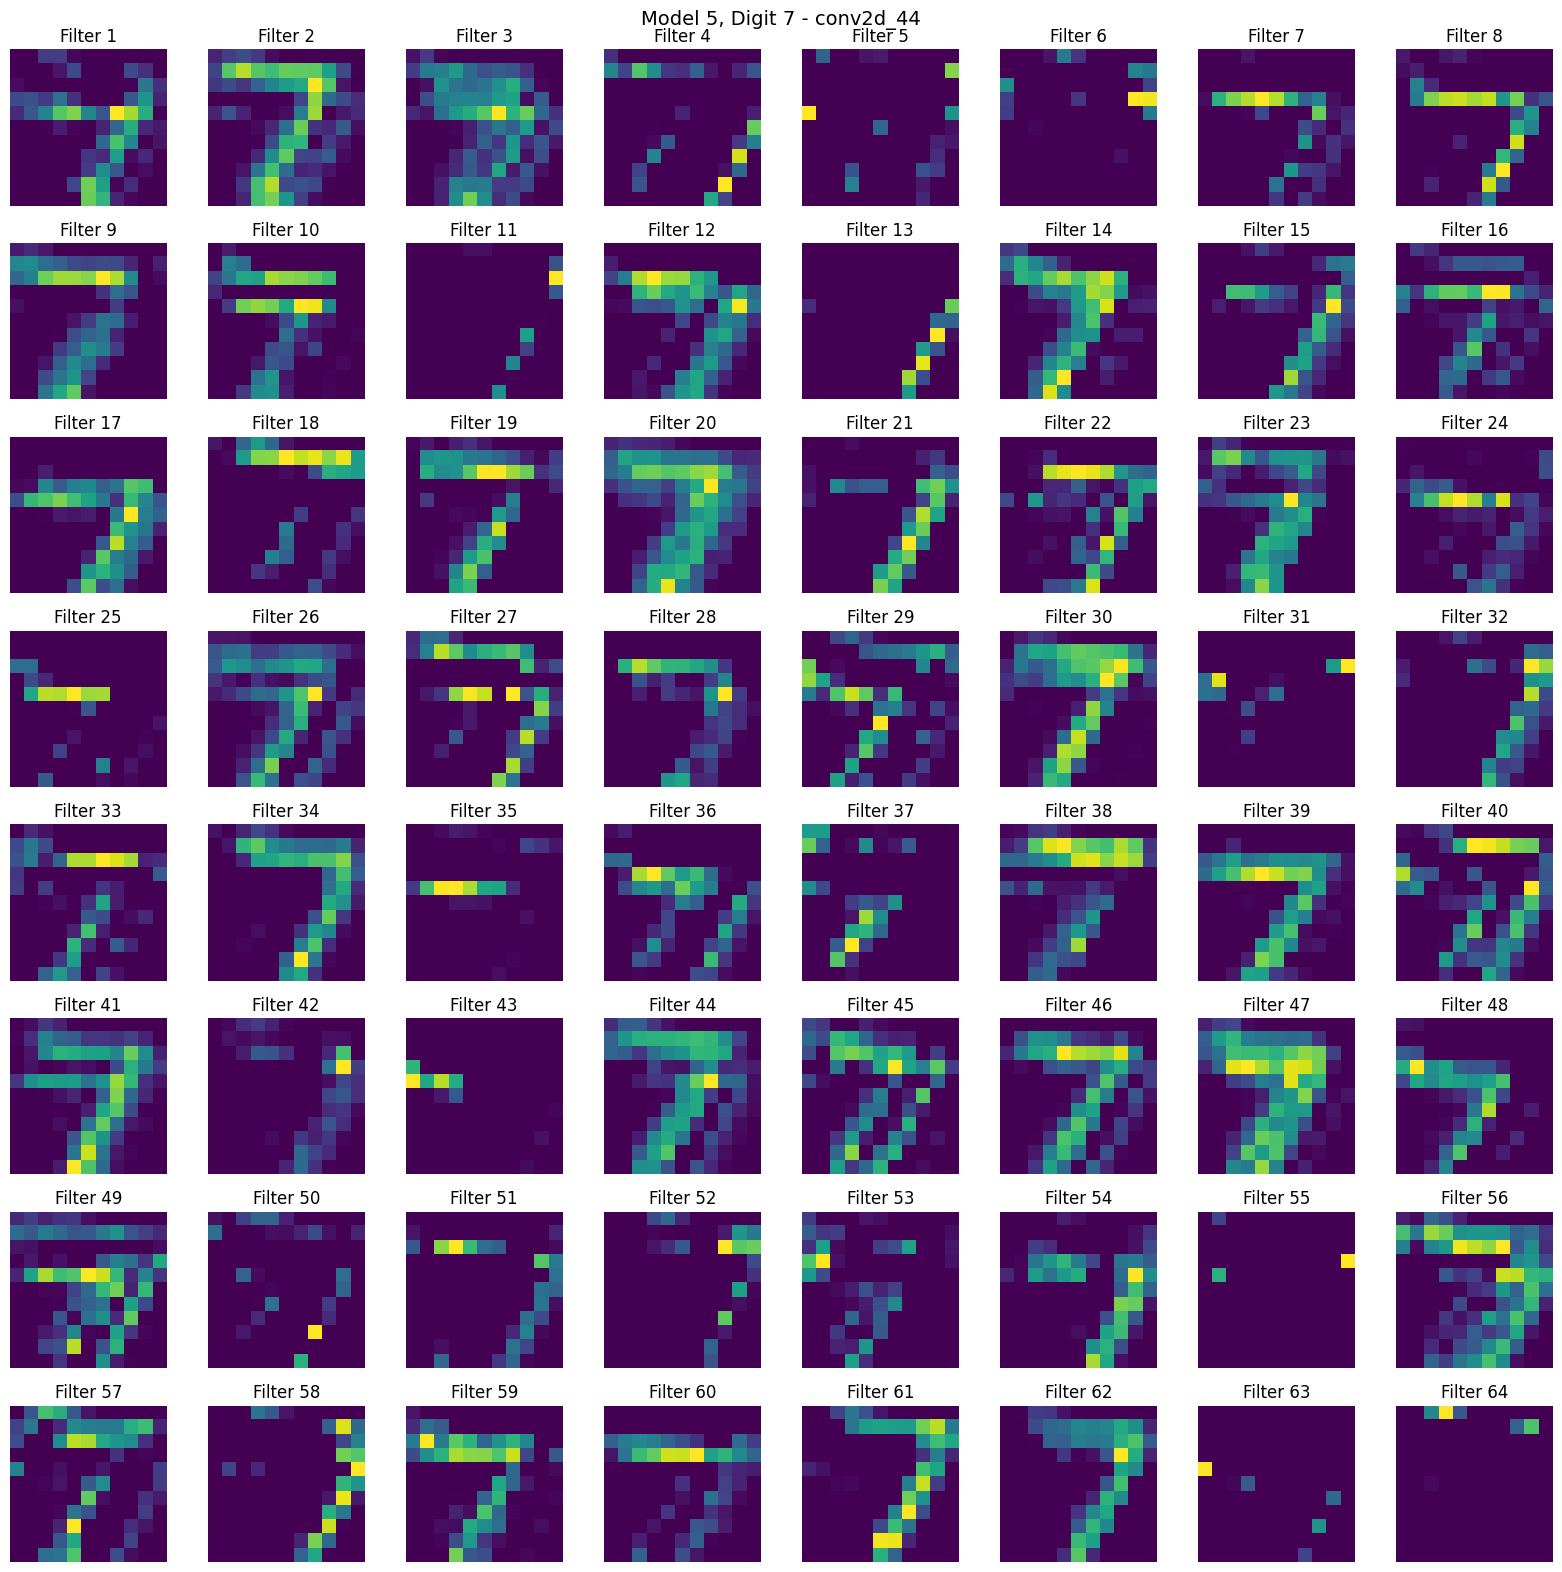


Model 7 feature maps for digit 7:


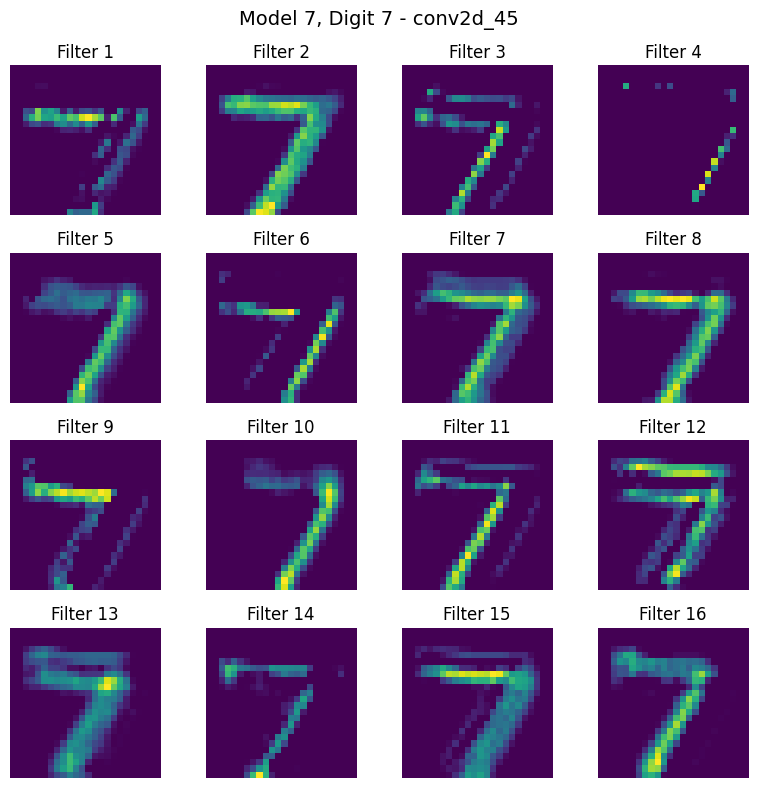

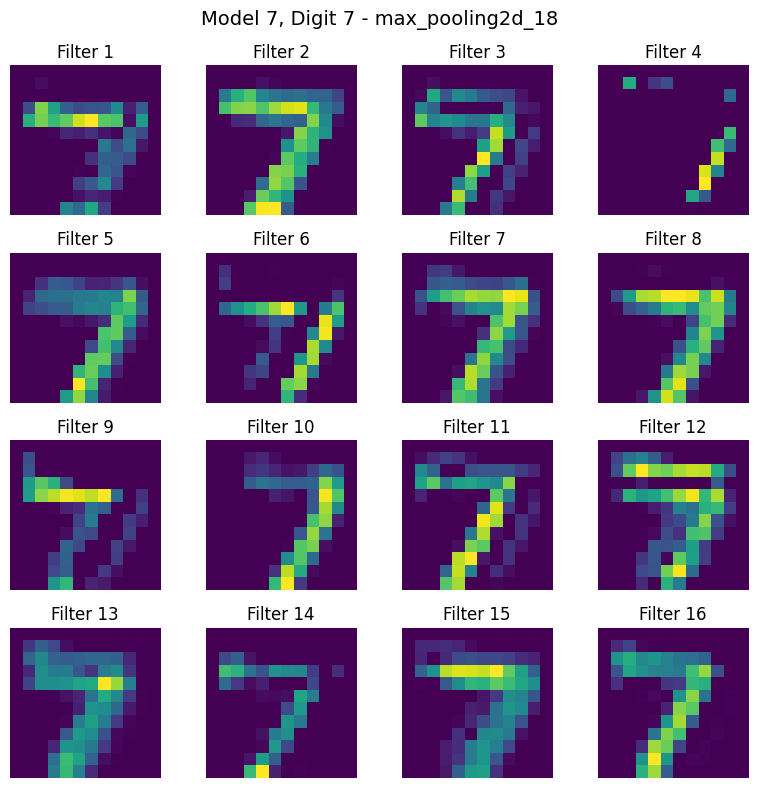

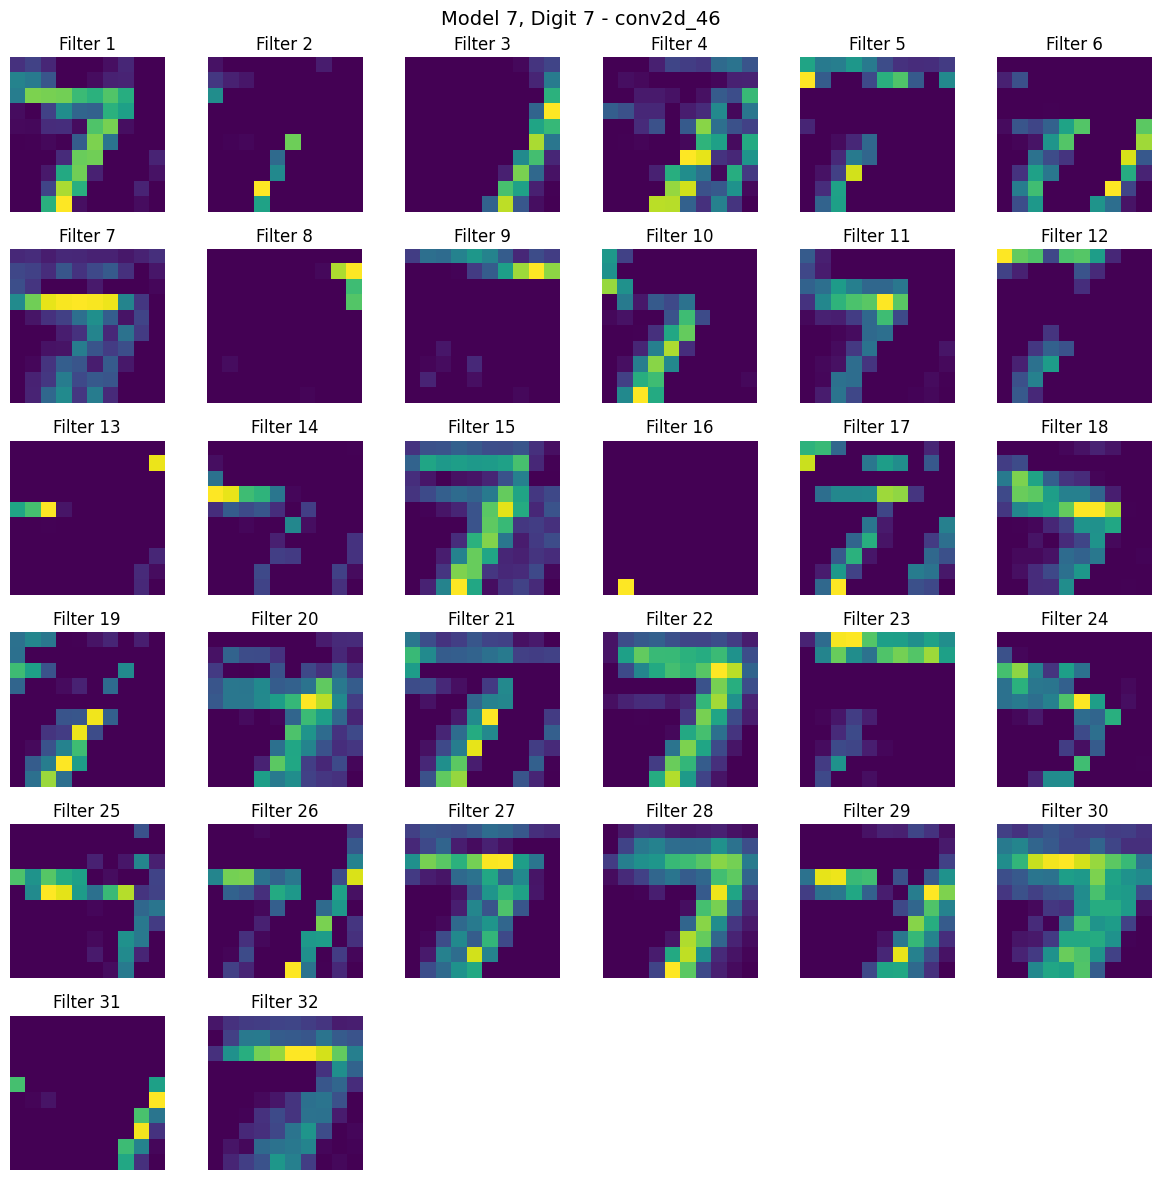

In [40]:
# Visualize feature maps for digit 7 across top 3 models
input_batch = np.expand_dims(sample_image, axis=0)

for model_idx in top_3_indices:
    config = model_configs[model_idx]
    model = build_model(config)
    model.build(input_shape=(None,) + x_train.shape[1:])
    
    print(f"\nModel {model_idx+1} feature maps for digit {sample_label}:")
    
    for layer in model.layers:
        if isinstance(layer, (Conv2D, MaxPool2D)):
            feature_maps = extract_feature_maps(model, layer.name, input_batch)
            visualize_feature_maps(feature_maps, model_idx, sample_label, layer.name)